<a href="https://colab.research.google.com/github/gabbypaola/COOP/blob/main/COOP_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#this outputs the whole df inside the notebook instead of only seeing a few rows
#pd.set_option('display.max_rows', None)

In [ ]:
#connect notebook to google drive to access CSV files
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#authenticate, needed for loading google sheets into the notebook
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
#load the original data set
df=pd.read_csv("/content/drive/My Drive/COOP/Data Analytics/Team Folder/Evictions.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67728 entries, 0 to 67727
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Court Index Number         67728 non-null  object 
 1   Docket Number              67728 non-null  int64  
 2   Eviction Address           67728 non-null  object 
 3   Eviction Apartment Number  56519 non-null  object 
 4   Executed Date              67728 non-null  object 
 5   Marshal First Name         67728 non-null  object 
 6   Marshal Last Name          67728 non-null  object 
 7   Residential/Commercial     67728 non-null  object 
 8   BOROUGH                    67728 non-null  object 
 9   Eviction Postcode          67728 non-null  int64  
 10  Ejectment                  67728 non-null  object 
 11  Eviction/Legal Possession  67728 non-null  object 
 12  Latitude                   61284 non-null  float64
 13  Longitude                  61284 non-null  flo

In [ ]:
df.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50365/19,352435,319 WEST 94TH STREET,C103,03/25/2019,Thomas,Bia,Residential,MANHATTAN,10025,Not an Ejectment,Possession,40.794205,-73.974734,7.0,6.0,183.0,1034178.0,1.012530e+09,Upper West Side
1,B068159/16,379048,2332 CRESTON AVE,41,04/25/2017,Richard,McCoy,Residential,BRONX,10468,Not an Ejectment,Possession,40.858643,-73.900402,5.0,14.0,23703.0,2013777.0,2.031640e+09,Fordham South
2,59891/16,320691,2670 BAINBRIDGE AVENUE,2F,02/21/2017,John,Villanueva,Residential,BRONX,10458,Not an Ejectment,Possession,40.865470,-73.891472,7.0,15.0,40502.0,2016620.0,2.032870e+09,Bedford Park-Fordham North
3,75708/18,115775,18-24 25TH ROAD,1,04/23/2019,Maxine,Chevlowe,Residential,QUEENS,11102,Not an Ejectment,Possession,40.774861,-73.926140,1.0,22.0,91.0,4019956.0,4.008870e+09,Old Astoria
4,900940/18,86395,3005 EASTCHESTER RO AD,STOREFRONT,11/08/2018,Justin,Grossman,Commercial,BRONX,10469,Not an Ejectment,Possession,40.869607,-73.842766,12.0,12.0,358.0,2061802.0,2.047620e+09,Eastchester-Edenwald-Baychester


In [ ]:
#df['Executed Date'] = pd.to_datetime(df['Executed Date'])

In [ ]:
df['month'] = pd.DatetimeIndex(df['Executed Date']).month

In [ ]:
df['year']= pd.DatetimeIndex(df['Executed Date']).year
#df['Executed Date'].dt.to_period('')

In [ ]:
df['month_year']= df['month'].astype(str) + '/' + df['year'].astype(str)
#df['Executed Date'].dt.to_period('M')

In [ ]:
df

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,...,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,month,year,month_year
0,50365/19,352435,319 WEST 94TH STREET,C103,03/25/2019,Thomas,Bia,Residential,MANHATTAN,10025,...,-73.974734,7.0,6.0,183.0,1034178.0,1.012530e+09,Upper West Side,3,2019,3/2019
1,B068159/16,379048,2332 CRESTON AVE,41,04/25/2017,Richard,McCoy,Residential,BRONX,10468,...,-73.900402,5.0,14.0,23703.0,2013777.0,2.031640e+09,Fordham South,4,2017,4/2017
2,59891/16,320691,2670 BAINBRIDGE AVENUE,2F,02/21/2017,John,Villanueva,Residential,BRONX,10458,...,-73.891472,7.0,15.0,40502.0,2016620.0,2.032870e+09,Bedford Park-Fordham North,2,2017,2/2017
3,75708/18,115775,18-24 25TH ROAD,1,04/23/2019,Maxine,Chevlowe,Residential,QUEENS,11102,...,-73.926140,1.0,22.0,91.0,4019956.0,4.008870e+09,Old Astoria,4,2019,4/2019
4,900940/18,86395,3005 EASTCHESTER RO AD,STOREFRONT,11/08/2018,Justin,Grossman,Commercial,BRONX,10469,...,-73.842766,12.0,12.0,358.0,2061802.0,2.047620e+09,Eastchester-Edenwald-Baychester,11,2018,11/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67723,R 50452/17,68450,182 ARLINGTON AVENUE,NaN,03/29/2017,Steven,Powell,Residential,STATEN ISLAND,10303,...,-74.167531,1.0,49.0,323.0,5028488.0,5.012670e+09,Mariner's Harbor-Arlington-Port Ivory-Granitev...,3,2017,3/2017
67724,N66489/17,81749,600 WEST 136TH STREE T,6F,09/27/2017,Ileana,Rivera,Residential,MANHATTAN,10031,...,-73.954996,9.0,7.0,22301.0,1059959.0,1.020020e+09,Manhattanville,9,2017,9/2017
67725,60675/17-1,208636,115 LINCOLN ROAD,3N,01/09/2020,Richard,Capuano,Residential,BROOKLYN,11225,...,-73.958799,9.0,40.0,79801.0,3379187.0,3.013270e+09,Prospect Lefferts Gardens-Wingate,1,2020,1/2020
67726,B42335/17,83318,1131-1133 OGDEN AVEN UE,12A,12/13/2017,Ileana,Rivera,Residential,BRONX,10452,...,-73.927496,4.0,16.0,199.0,2088158.0,2.025260e+09,Highbridge,12,2017,12/2017


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67728 entries, 0 to 67727
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Court Index Number         67728 non-null  object 
 1   Docket Number              67728 non-null  int64  
 2   Eviction Address           67728 non-null  object 
 3   Eviction Apartment Number  56519 non-null  object 
 4   Executed Date              67728 non-null  object 
 5   Marshal First Name         67728 non-null  object 
 6   Marshal Last Name          67728 non-null  object 
 7   Residential/Commercial     67728 non-null  object 
 8   BOROUGH                    67728 non-null  object 
 9   Eviction Postcode          67728 non-null  int64  
 10  Ejectment                  67728 non-null  object 
 11  Eviction/Legal Possession  67728 non-null  object 
 12  Latitude                   61284 non-null  float64
 13  Longitude                  61284 non-null  flo

In [ ]:
df.groupby(['Residential/Commercial','year']).size()

Residential/Commercial  year
Commercial              2017     1720
                        2018     1842
                        2019     1702
                        2020      382
                        2021      111
                        2022      152
Residential             2017    20811
                        2018    19988
                        2019    17135
                        2020     3266
                        2021      161
                        2022      458
dtype: int64

In [ ]:
#print how many NA in each column
for column in df:
  print(column, df[column].isna().sum())

Court Index Number 0
Docket Number  0
Eviction Address 0
Eviction Apartment Number 11209
Executed Date 0
Marshal First Name 0
Marshal Last Name 0
Residential/Commercial 0
BOROUGH 0
Eviction Postcode 0
Ejectment 0
Eviction/Legal Possession 0
Latitude 6444
Longitude 6444
Community Board 6444
Council District 6444
Census Tract 6444
BIN 6562
BBL 6562
NTA 6444
month 0
year 0
month_year 0


In [ ]:
df.groupby(['Eviction Postcode','Residential/Commercial','year']).size().reset_index()
#there is 3 residential zip code of value 0 and a commercial zip code of 1000
#the residential zip code will be manually cleaned 

,Eviction Postcode,Residential/Commercial,year,0
0,0,Residential,2018,3
1,1000,Commercial,2017,1
2,10000,Residential,2019,1
3,10001,Commercial,2017,62
4,10001,Commercial,2018,86
...,...,...,...,...
1711,11694,Residential,2021,3
1712,11694,Residential,2022,1
1713,11698,Residential,2019,1
1714,11753,Commercial,2017,1


In [ ]:
#identifying incorrect zip code-borough matches
zips = df.groupby(['Eviction Postcode', 'BOROUGH']).size().reset_index()

In [ ]:
#there are 13 instances of incorrectly matched zip codes
zips['Eviction Postcode'].duplicated().sum()

13

In [ ]:
zips[zips['Eviction Postcode'].duplicated()]

,Eviction Postcode,BOROUGH,0
1,0,BROOKLYN,1
2,0,MANHATTAN,1
22,10019,MANHATTAN,343
34,10030,MANHATTAN,422
46,10044,MANHATTAN,33
85,10452,MANHATTAN,1
86,10452,QUEENS,1
98,10463,MANHATTAN,95
105,10469,MANHATTAN,1
108,10471,MANHATTAN,1


In [ ]:
zips

,Eviction Postcode,BOROUGH,0
0,0,BRONX,1
1,0,BROOKLYN,1
2,0,MANHATTAN,1
3,1000,MANHATTAN,1
4,10000,MANHATTAN,1
...,...,...,...
231,11693,QUEENS,106
232,11694,QUEENS,142
233,11698,QUEENS,1
234,11753,BRONX,1


In [ ]:
df[df['Eviction Postcode']==11040]

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,...,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,month,year,month_year
5542,Q66836/19B,102609,76-05 267TH STREET,NaN,02/28/2020,Ileana,Rivera,Residential,QUEENS,11040,...,-73.708438,13.0,23.0,155102.0,4174103.0,4.085430e+09,Glen Oaks-Floral Park-New Hyde Park,2,2020,2/2020
12923,60287/18B,84510,80-15 LANGDALE STR EET,ENTIRE HOUSE,12/07/2018,Justin,Grossman,Residential,QUEENS,11040,...,-73.701430,13.0,23.0,157901.0,4178385.0,4.087270e+09,Glen Oaks-Floral Park-New Hyde Park,12,2018,12/2018
18527,Q66836/19,102608,76-05 267TH STREET,NaN,02/28/2020,Ileana,Rivera,Residential,QUEENS,11040,...,-73.708438,13.0,23.0,155102.0,4174103.0,4.085430e+09,Glen Oaks-Floral Park-New Hyde Park,2,2020,2/2020
19046,78442/17,7569,76-43 270 ST - BSMT,NaN,04/13/2018,Robert,Renzulli,Residential,QUEENS,11040,...,-73.706115,13.0,23.0,155102.0,4174204.0,4.085480e+09,Glen Oaks-Floral Park-New Hyde Park,4,2018,4/2018
35962,78442/17,7798,76-43 270 ST - BASEMENT,BASEMENT,04/13/2018,Robert,Renzulli,Residential,QUEENS,11040,...,-73.706115,13.0,23.0,155102.0,4174204.0,4.085480e+09,Glen Oaks-Floral Park-New Hyde Park,4,2018,4/2018
37948,Q77315/18,114809,271-02/04 UNION TURNPIKE,BSMT & STORE PREMISE,06/26/2019,Darlene,Barone,Commercial,QUEENS,11040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2019,6/2019
48729,60287/18A,84509,80-15 LANGDALE STR EET,ENTIRE HOUSE,12/07/2018,Justin,Grossman,Residential,QUEENS,11040,...,-73.701430,13.0,23.0,157901.0,4178385.0,4.087270e+09,Glen Oaks-Floral Park-New Hyde Park,12,2018,12/2018
53047,58863/19,8892,76-08 271 STREET,NaN,07/24/2019,Bernard,Blake,Residential,QUEENS,11040,...,-73.705956,13.0,23.0,155102.0,4174191.0,4.085480e+09,Glen Oaks-Floral Park-New Hyde Park,7,2019,7/2019
54953,72494/17,8704,265-17 UNION TURNPIK E,NaN,01/11/2018,George,"Essock, Jr.",Commercial,QUEENS,11040,...,-73.707657,13.0,23.0,155102.0,4174077.0,4.085410e+09,Glen Oaks-Floral Park-New Hyde Park,1,2018,1/2018
60546,78860/18,15966,265-17 UNION TURNPIK E COMMERCIAL SPACE,NaN,04/24/2019,George,"Essock, Jr.",Commercial,QUEENS,11040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2019,4/2019


In [ ]:
df.at[39095,'Eviction Postcode'] = 10474
df.at[62213,'Eviction Postcode'] = 11694
df.at[58994,'Eviction Postcode'] = 11423
df.at[19168,'Eviction Postcode'] = 11226
df.at[4234,'Eviction Postcode'] = 11412
df.at[13549,'Eviction Postcode'] = 11434
df.at[66916,'Eviction Postcode'] = 11221
df.at[11514,'Eviction Postcode'] = 11222
df.at[45748,'Eviction Postcode'] = 10306
df.at[59962,'Eviction Postcode'] = 10039
df.at[2661,'Eviction Postcode'] = 10035
df.at[58913,'Eviction Postcode'] = 10017
df.at[43875	,'Eviction Postcode'] = 11204
df.at[4949,'Eviction Postcode'] = 10301
df.at[1663,'Eviction Postcode'] = 11422
df.at[43578,'Eviction Postcode'] = 11422
df.at[16662,'Eviction Postcode'] = 11377
df.at[66835,'Eviction Postcode'] = 11377
df.at[15575,'Eviction Postcode'] = 11234
df.at[1192,'Eviction Postcode'] = 11691

In [ ]:
df.at[51442,'BOROUGH'] = 'BRONX'
df.at[51442,'Eviction Postcode'] = 10463

In [ ]:
index_list_3 = df[(df['Eviction Postcode']==11384)].index.tolist()
#len(index_list_3) #there are 4 

for i in index_list_3:
  df.at[i,'Eviction Postcode'] = 11385

In [ ]:
df[df['Eviction Postcode']==0]

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,...,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,month,year,month_year
13354,K077953/17,384362,3315 NOSTRAND AVENUE,4D,07/13/2018,Richard,McCoy,Residential,BROOKLYN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2018,7/2018
40450,66761/17,154216,781 JENNINGS STREET,NaN,04/19/2018,Ronald,Pazant,Residential,BRONX,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2018,4/2018
64483,251967/17,3704,76 WEST 132ND STREET,#2,08/23/2018,Vadim,Barbarovich,Residential,MANHATTAN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2018,8/2018


In [ ]:
df[df['Eviction Postcode']==11698]

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,...,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,month,year,month_year


In [ ]:
df.at[29327,'BOROUGH'] = 'MANHATTAN'
df.at[29328,'BOROUGH'] = 'MANHATTAN'

In [ ]:
df.at[22073,'BOROUGH'] = 'MANHATTAN'

In [ ]:
df.at[63245,'BOROUGH'] = 'BRONX'
df.at[3670,'BOROUGH'] = 'BRONX'

In [ ]:
#list of index numbers where the zip code is 10463 and boro is manhattan (should be bronx)
index_list = df[(df['Eviction Postcode']==10463) & (df["BOROUGH"]=='MANHATTAN')].index.tolist()

In [ ]:
len(df[(df['Eviction Postcode']==10463) & (df["BOROUGH"]=='MANHATTAN')].index.tolist())

95

In [ ]:
for i in index_list:
  df.at[i,'BOROUGH'] = 'BRONX'

In [ ]:
index_list_2 = df[(df['Eviction Postcode']==11101) & (df["BOROUGH"]=='MANHATTAN')].index.tolist()
len(index_list_2)

3

In [ ]:
for i in index_list_2:
  df.at[i,'BOROUGH'] = 'QUEENS'

In [ ]:
df.at[26902, 'BOROUGH'] = 'MANHATTAN'

In [ ]:
df.at[53873, 'BOROUGH'] = 'BRONX'

In [ ]:
df.at[37729, 'BOROUGH'] = 'BRONX'

In [ ]:
df.at[15139, 'BOROUGH'] = 'BROOKLYN'

In [ ]:
df.at[47743, 'BOROUGH'] = 'BROOKLYN'

In [ ]:
zips_2 = df.groupby(['Eviction Postcode', 'BOROUGH']).size().reset_index()

In [ ]:
df[df['Eviction Postcode']==0]

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,...,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,month,year,month_year
13354,K077953/17,384362,3315 NOSTRAND AVENUE,4D,07/13/2018,Richard,McCoy,Residential,BROOKLYN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2018,7/2018
40450,66761/17,154216,781 JENNINGS STREET,NaN,04/19/2018,Ronald,Pazant,Residential,BRONX,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2018,4/2018
64483,251967/17,3704,76 WEST 132ND STREET,#2,08/23/2018,Vadim,Barbarovich,Residential,MANHATTAN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2018,8/2018


In [ ]:
#replace 0 zip code with actual zip using address in google
#row index and column name
df.at[13354,'Eviction Postcode'] = 11229
df.at[40450,'Eviction Postcode'] = 10459
df.at[64483,'Eviction Postcode'] = 10037

In [ ]:
#lets check if it worked
df[df['Eviction Postcode']==0]

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,...,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,month,year,month_year


In [ ]:
zips_2 = df.groupby(['Eviction Postcode', 'BOROUGH']).size().reset_index()

In [ ]:
zips_2

,Eviction Postcode,BOROUGH,0
0,1000,MANHATTAN,1
1,10001,MANHATTAN,358
2,10002,MANHATTAN,338
3,10003,MANHATTAN,167
4,10004,MANHATTAN,23
...,...,...,...
197,11691,QUEENS,877
198,11692,QUEENS,362
199,11693,QUEENS,106
200,11694,QUEENS,143


In [ ]:
#no more duplicate zips 
zips_2['Eviction Postcode'].duplicated().sum()

0

References:   
https://evictionlab.org/methods/#calculate-rate  
https://data.census.gov/cedsci/table?t=Housing&g=0500000US36005,36047,36061,36081,36085&tid=ACSST1Y2018.S2501
https://datascience.stackexchange.com/questions/84406/how-to-deal-with-nan-values-after-merging-joining-two-dataframes  
https://re-thought.com/how-to-change-or-update-a-cell-value-in-python-pandas-dataframe/

********************************************************************************

****************************************************************

In [ ]:
#filter only residential evictions
residential_evictions = df[df['Residential/Commercial']=='Residential']

In [ ]:
#residential_evictions

In [ ]:
residential_evictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61819 entries, 0 to 67727
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Court Index Number         61819 non-null  object 
 1   Docket Number              61819 non-null  int64  
 2   Eviction Address           61819 non-null  object 
 3   Eviction Apartment Number  53602 non-null  object 
 4   Executed Date              61819 non-null  object 
 5   Marshal First Name         61819 non-null  object 
 6   Marshal Last Name          61819 non-null  object 
 7   Residential/Commercial     61819 non-null  object 
 8   BOROUGH                    61819 non-null  object 
 9   Eviction Postcode          61819 non-null  int64  
 10  Ejectment                  61819 non-null  object 
 11  Eviction/Legal Possession  61819 non-null  object 
 12  Latitude                   57305 non-null  float64
 13  Longitude                  57305 non-null  flo

In [ ]:
#rename Evicition Postcode to Zip Code
residential_evictions=residential_evictions.rename(columns = {'Eviction Postcode':'Zip Code'})

In [ ]:
residential_evictions.drop(df.columns[[0,1,5,6,7,14,15,16,17,18,19]],axis=1, inplace=True)

In [ ]:
residential_evictions

,Eviction Address,Eviction Apartment Number,Executed Date,BOROUGH,Zip Code,Ejectment,Eviction/Legal Possession,Latitude,Longitude,month,year,month_year
0,319 WEST 94TH STREET,C103,03/25/2019,MANHATTAN,10025,Not an Ejectment,Possession,40.794205,-73.974734,3,2019,3/2019
1,2332 CRESTON AVE,41,04/25/2017,BRONX,10468,Not an Ejectment,Possession,40.858643,-73.900402,4,2017,4/2017
2,2670 BAINBRIDGE AVENUE,2F,02/21/2017,BRONX,10458,Not an Ejectment,Possession,40.865470,-73.891472,2,2017,2/2017
3,18-24 25TH ROAD,1,04/23/2019,QUEENS,11102,Not an Ejectment,Possession,40.774861,-73.926140,4,2019,4/2019
5,153-12 FOCH BLVD.,PRIVATE HOUSE,07/12/2019,QUEENS,11434,Not an Ejectment,Possession,40.681478,-73.789636,7,2019,7/2019
...,...,...,...,...,...,...,...,...,...,...,...,...
67723,182 ARLINGTON AVENUE,NaN,03/29/2017,STATEN ISLAND,10303,Not an Ejectment,Possession,40.635485,-74.167531,3,2017,3/2017
67724,600 WEST 136TH STREE T,6F,09/27/2017,MANHATTAN,10031,Not an Ejectment,Possession,40.820935,-73.954996,9,2017,9/2017
67725,115 LINCOLN ROAD,3N,01/09/2020,BROOKLYN,11225,Not an Ejectment,Possession,40.661077,-73.958799,1,2020,1/2020
67726,1131-1133 OGDEN AVEN UE,12A,12/13/2017,BRONX,10452,Not an Ejectment,Possession,40.836286,-73.927496,12,2017,12/2017


In [ ]:
res_zip_evictions = residential_evictions.groupby(['year', 'Zip Code','BOROUGH']).size().reset_index()

In [ ]:
res_zip_evictions=res_zip_evictions.rename(columns = {0:'Evictions'})

In [ ]:
res_zip_evictions[res_zip_evictions['Zip Code']==10019]

,year,Zip Code,BOROUGH,Evictions
16,2017,10019,MANHATTAN,95
199,2018,10019,MANHATTAN,87
378,2019,10019,MANHATTAN,89
557,2020,10019,MANHATTAN,13
718,2021,10019,MANHATTAN,1
795,2022,10019,MANHATTAN,1


In [ ]:
residential_evictions.groupby(['BOROUGH','Zip Code','year']).size().reset_index()

,BOROUGH,Zip Code,year,0
0,BRONX,10451,2017,268
1,BRONX,10451,2018,310
2,BRONX,10451,2019,254
3,BRONX,10451,2020,63
4,BRONX,10451,2021,1
...,...,...,...,...
910,STATEN ISLAND,10314,2018,60
911,STATEN ISLAND,10314,2019,50
912,STATEN ISLAND,10314,2020,7
913,STATEN ISLAND,10314,2021,3


In [ ]:
#create list of the years we want
years_of_interest = [2017,2018,2019]

In [ ]:
#filter the year column using `isin()` function and our list from above
res_zip_evictions = res_zip_evictions[res_zip_evictions.year.isin(years_of_interest)]

In [ ]:
res_zip_evictions

,year,Zip Code,BOROUGH,Evictions
0,2017,10001,MANHATTAN,46
1,2017,10002,MANHATTAN,77
2,2017,10003,MANHATTAN,42
3,2017,10004,MANHATTAN,3
4,2017,10005,MANHATTAN,14
...,...,...,...,...
538,2019,11436,QUEENS,58
539,2019,11691,QUEENS,254
540,2019,11692,QUEENS,101
541,2019,11693,QUEENS,31


In [ ]:
#load in the GOOGLE SHEET where the rental data is at

worksheet0 = gc.open('2017-2019 Rental Units').sheet1

# get_all_values gives a list of rows.
rows0 = worksheet0.get_all_values()
#print(rows)

rental_data = pd.DataFrame.from_records(rows0)

new_header = rental_data.iloc[0] #grab the first row for the header
rental_data = rental_data[1:] #take the data less the header row
rental_data.columns = new_header #set the header row as the df header

#convert to integers
rental_data['Zip Code']=rental_data['Zip Code'].astype(str).astype(int)
rental_data['Year']=rental_data['Year'].astype(str).astype(int)
rental_data['Renter Occupied Units']=rental_data['Renter Occupied Units'].astype(str).astype(int)

rental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99360 entries, 1 to 99360
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Renter Occupied Units  99360 non-null  int64
 1   Zip Code               99360 non-null  int64
 2   Year                   99360 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


In [ ]:
rental_data

,Renter Occupied Units,Zip Code,Year
1,965,25303,2019
2,28,25245,2019
3,46,25268,2019
4,95,25286,2019
5,2496,25311,2019
...,...,...,...
99356,1468,70764,2017
99357,117,70770,2017
99358,225,70778,2017
99359,52,70789,2017


In [ ]:
#left merge the residential data with the rental units
zip_residential_evictions = pd.merge(res_zip_evictions, rental_data, how= 'left', left_on=['year', 'Zip Code'], right_on=['Year', 'Zip Code'])

In [ ]:
#NAs are introduced in the Renter Occupied Units column since there was no Census data for some of the Zip Code in our original dataset
zip_residential_evictions

,year,Zip Code,BOROUGH,Evictions,Renter Occupied Units,Year
0,2017,10001,MANHATTAN,46,8868.0,2017.0
1,2017,10002,MANHATTAN,77,28951.0,2017.0
2,2017,10003,MANHATTAN,42,17979.0,2017.0
3,2017,10004,MANHATTAN,3,1113.0,2017.0
4,2017,10005,MANHATTAN,14,3461.0,2017.0
...,...,...,...,...,...,...
538,2019,11436,QUEENS,58,1641.0,2019.0
539,2019,11691,QUEENS,254,16014.0,2019.0
540,2019,11692,QUEENS,101,4715.0,2019.0
541,2019,11693,QUEENS,31,2420.0,2019.0


In [ ]:
#remove Year column that came from the rental_data table
zip_residential_evictions= zip_residential_evictions.drop(labels=['Year'],axis='columns')

In [ ]:
zip_residential_evictions

,year,Zip Code,BOROUGH,Evictions,Renter Occupied Units
0,2017,10001,MANHATTAN,46,8868.0
1,2017,10002,MANHATTAN,77,28951.0
2,2017,10003,MANHATTAN,42,17979.0
3,2017,10004,MANHATTAN,3,1113.0
4,2017,10005,MANHATTAN,14,3461.0
...,...,...,...,...,...
538,2019,11436,QUEENS,58,1641.0
539,2019,11691,QUEENS,254,16014.0
540,2019,11692,QUEENS,101,4715.0
541,2019,11693,QUEENS,31,2420.0


In [ ]:
#load income CSV
df_incomes =pd.read_csv("/content/drive/My Drive/COOP/Data Analytics/Team Folder/Incomes.csv")

df_incomes=df_incomes.rename(columns = {df_incomes.columns[1]:'Median Income',df_incomes.columns[2]:'Zip Code'})

df_incomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           543 non-null    int64 
 1   Median Income  543 non-null    object
 2   Zip Code       543 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 12.9+ KB


In [ ]:
#left merge residential data with income data
zip_residential_evictions= pd.merge(zip_residential_evictions, df_incomes, how= 'left', left_on=['year', 'Zip Code'], right_on=['Year', 'Zip Code'])

In [ ]:
#there are 0.0 in renter occupied units, column but there are evictions in place, need to convert to NA to then impute those too
zip_residential_evictions

,year,Zip Code,BOROUGH,Evictions,Renter Occupied Units,Year,Median Income
0,2017,10001,MANHATTAN,46,8868.0,2017.0,"$88,880.07"
1,2017,10002,MANHATTAN,77,28951.0,2017.0,"$36,971.05"
2,2017,10003,MANHATTAN,42,17979.0,2017.0,"$108,925.31"
3,2017,10004,MANHATTAN,3,1113.0,2017.0,"$146,480.40"
4,2017,10005,MANHATTAN,14,3461.0,2017.0,"$160,834.33"
...,...,...,...,...,...,...,...
538,2019,11436,QUEENS,58,1641.0,2019.0,"$75,222.00"
539,2019,11691,QUEENS,254,16014.0,2019.0,"$50,267.00"
540,2019,11692,QUEENS,101,4715.0,2019.0,"$46,819.00"
541,2019,11693,QUEENS,31,2420.0,2019.0,"$60,569.00"


In [ ]:
#replace 0 with NaN for later imputation
zip_residential_evictions['Renter Occupied Units']= zip_residential_evictions['Renter Occupied Units'].replace(0, np.NaN)

In [ ]:
#drop the extra year column
zip_residential_evictions= zip_residential_evictions.drop(labels=['Year'],axis='columns')

In [ ]:
#remove the dollar sign
zip_residential_evictions['Median Income']=zip_residential_evictions['Median Income'].str.replace('$', '', regex=True)

In [ ]:
#remove the comma and covert to float
zip_residential_evictions['Median Income']=zip_residential_evictions['Median Income'].str.replace(',', '', regex=True).astype(str).astype(float)

In [ ]:
zip_residential_evictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 542
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   543 non-null    int64  
 1   Zip Code               543 non-null    int64  
 2   BOROUGH                543 non-null    object 
 3   Evictions              543 non-null    int64  
 4   Renter Occupied Units  534 non-null    float64
 5   Median Income          532 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 29.7+ KB


In [ ]:
zip_residential_evictions.isna().sum()

year                      0
Zip Code                  0
BOROUGH                   0
Evictions                 0
Renter Occupied Units     9
Median Income            11
dtype: int64

In [ ]:
#left off here; next step impute NA values

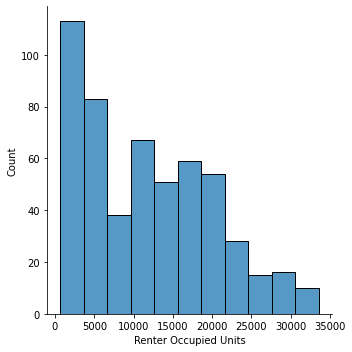

In [ ]:
#histos of the distros (histograms of the distributions)
#right skew = mean is to the right (greater than median) of median
sns.displot(zip_residential_evictions, x="Renter Occupied Units")

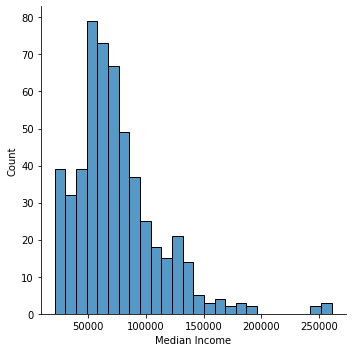

In [ ]:
#also right skewed
sns.displot(zip_residential_evictions, x="Median Income")

In [ ]:
#interpolate Median Income
zip_residential_evictions['Interpolated_Median_Income'] = round(zip_residential_evictions['Median Income'].interpolate(), 0)

In [ ]:
#interpolate rental units
zip_residential_evictions['Interpolated_Rental_Units'] = round(zip_residential_evictions['Renter Occupied Units'].interpolate(), 0)

In [ ]:
#check the NA counts
zip_residential_evictions.isna().sum()

year                           0
Zip Code                       0
BOROUGH                        0
Evictions                      0
Renter Occupied Units          9
Median Income                 11
Interpolated_Median_Income     0
Interpolated_Rental_Units      0
dtype: int64

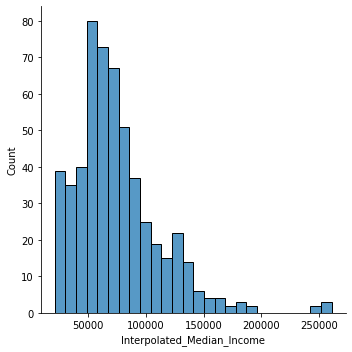

In [ ]:
sns.displot(zip_residential_evictions, x="Interpolated_Median_Income")

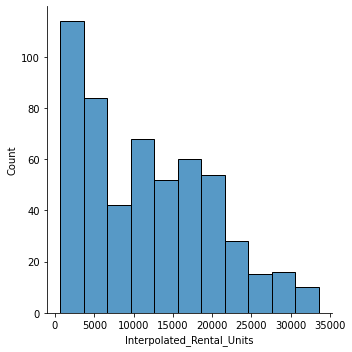

In [ ]:
sns.displot(zip_residential_evictions, x="Interpolated_Rental_Units")

In [ ]:
zip_residential_evictions

,year,Zip Code,BOROUGH,Evictions,Renter Occupied Units,Median Income,Interpolated_Median_Income,Interpolated_Rental_Units
0,2017,10001,MANHATTAN,46,8868.0,88880.07,88880.0,8868.0
1,2017,10002,MANHATTAN,77,28951.0,36971.05,36971.0,28951.0
2,2017,10003,MANHATTAN,42,17979.0,108925.31,108925.0,17979.0
3,2017,10004,MANHATTAN,3,1113.0,146480.40,146480.0,1113.0
4,2017,10005,MANHATTAN,14,3461.0,160834.33,160834.0,3461.0
...,...,...,...,...,...,...,...,...
538,2019,11436,QUEENS,58,1641.0,75222.00,75222.0,1641.0
539,2019,11691,QUEENS,254,16014.0,50267.00,50267.0,16014.0
540,2019,11692,QUEENS,101,4715.0,46819.00,46819.0,4715.0
541,2019,11693,QUEENS,31,2420.0,60569.00,60569.0,2420.0


In [ ]:
clean_zip_residential_evictions = zip_residential_evictions.drop(labels=['Renter Occupied Units', 'Median Income'],axis='columns')

In [ ]:
clean_zip_residential_evictions

,year,Zip Code,BOROUGH,Evictions,Interpolated_Median_Income,Interpolated_Rental_Units
0,2017,10001,MANHATTAN,46,88880.0,8868.0
1,2017,10002,MANHATTAN,77,36971.0,28951.0
2,2017,10003,MANHATTAN,42,108925.0,17979.0
3,2017,10004,MANHATTAN,3,146480.0,1113.0
4,2017,10005,MANHATTAN,14,160834.0,3461.0
...,...,...,...,...,...,...
538,2019,11436,QUEENS,58,75222.0,1641.0
539,2019,11691,QUEENS,254,50267.0,16014.0
540,2019,11692,QUEENS,101,46819.0,4715.0
541,2019,11693,QUEENS,31,60569.0,2420.0


In [ ]:
clean_zip_residential_evictions['Interpolated_Median_Income'] = clean_zip_residential_evictions['Interpolated_Median_Income'].astype(int)

In [ ]:
clean_zip_residential_evictions['Interpolated_Rental_Units'] = clean_zip_residential_evictions['Interpolated_Rental_Units'].astype(int)

In [ ]:
clean_zip_residential_evictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 542
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   year                        543 non-null    int64 
 1   Zip Code                    543 non-null    int64 
 2   BOROUGH                     543 non-null    object
 3   Evictions                   543 non-null    int64 
 4   Interpolated_Median_Income  543 non-null    int64 
 5   Interpolated_Rental_Units   543 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 45.9+ KB


In [ ]:
#create eviction rate column
clean_zip_residential_evictions['eviction_rate'] = round((clean_zip_residential_evictions['Evictions']/clean_zip_residential_evictions['Interpolated_Rental_Units'])*100,3)

In [ ]:
clean_zip_residential_evictions

,year,Zip Code,BOROUGH,Evictions,Interpolated_Median_Income,Interpolated_Rental_Units,eviction_rate
0,2017,10001,MANHATTAN,46,88880,8868,0.519
1,2017,10002,MANHATTAN,77,36971,28951,0.266
2,2017,10003,MANHATTAN,42,108925,17979,0.234
3,2017,10004,MANHATTAN,3,146480,1113,0.270
4,2017,10005,MANHATTAN,14,160834,3461,0.405
...,...,...,...,...,...,...,...
538,2019,11436,QUEENS,58,75222,1641,3.534
539,2019,11691,QUEENS,254,50267,16014,1.586
540,2019,11692,QUEENS,101,46819,4715,2.142
541,2019,11693,QUEENS,31,60569,2420,1.281


In [ ]:
#update column names for CSV 
clean_zip_residential_evictions = clean_zip_residential_evictions.rename(columns = {'Interpolated_Median_Income':'Median Income', 'Interpolated_Rental_Units': 'Rental Units'})

In [ ]:
#double check if there are any NAs left
clean_zip_residential_evictions.isna().sum()

year             0
Zip Code         0
BOROUGH          0
Evictions        0
Median Income    0
Rental Units     0
eviction_rate    0
dtype: int64

In [ ]:
#create CSV file and load it to team folder
#clean_zip_residential_evictions.to_csv('/content/drive/My Drive/COOP/Data Analytics/Team Folder/EvictionRates_Income.csv', index=False)

In [ ]:
column_1 = clean_zip_residential_evictions["Median Income"]
column_2 = clean_zip_residential_evictions["eviction_rate"]
correlation = column_1.corr(column_2)

In [ ]:
correlation

-0.40541435305202755

In [ ]:
#get zips for race data merge
zips_of_interest = clean_zip_residential_evictions['Zip Code']

In [ ]:
#zips_of_interest.to_csv('/content/drive/My Drive/COOP/Data Analytics/Project 1/ZipCodes.csv', index=False)

In [ ]:
zips_borough= clean_zip_residential_evictions[['Zip Code','BOROUGH']]

In [ ]:
#zips_borough.to_csv('/content/drive/My Drive/COOP/Data Analytics/Project 1/ZipCodes_Borough.csv', index=False)

In [ ]:
#new_df_clean['eviction_rate'] = round((new_df_clean['Evictions']/new_df_clean['Units'])*100,2)

In [ ]:
monthly_residential_evictions = residential_evictions.groupby(['Zip Code','month_year', 'year']).size().reset_index()

In [ ]:
monthly_residential_evictions

,Zip Code,month_year,year,0
0,10001,1/2017,2017,7
1,10001,1/2019,2019,5
2,10001,1/2022,2022,1
3,10001,10/2017,2017,5
4,10001,10/2018,2018,5
...,...,...,...,...
6559,11694,8/2019,2019,3
6560,11694,9/2017,2017,3
6561,11694,9/2018,2018,6
6562,11694,9/2019,2019,2


In [ ]:
monthly_residential_evictions = residential_evictions.groupby(['Zip Code','month_year']).size().reset_index()


In [ ]:
residential_evictions

,Eviction Address,Eviction Apartment Number,Executed Date,BOROUGH,Zip Code,Ejectment,Eviction/Legal Possession,Latitude,Longitude,month,year,month_year
0,319 WEST 94TH STREET,C103,03/25/2019,MANHATTAN,10025,Not an Ejectment,Possession,40.794205,-73.974734,3,2019,3/2019
1,2332 CRESTON AVE,41,04/25/2017,BRONX,10468,Not an Ejectment,Possession,40.858643,-73.900402,4,2017,4/2017
2,2670 BAINBRIDGE AVENUE,2F,02/21/2017,BRONX,10458,Not an Ejectment,Possession,40.865470,-73.891472,2,2017,2/2017
3,18-24 25TH ROAD,1,04/23/2019,QUEENS,11102,Not an Ejectment,Possession,40.774861,-73.926140,4,2019,4/2019
5,153-12 FOCH BLVD.,PRIVATE HOUSE,07/12/2019,QUEENS,11434,Not an Ejectment,Possession,40.681478,-73.789636,7,2019,7/2019
...,...,...,...,...,...,...,...,...,...,...,...,...
67723,182 ARLINGTON AVENUE,NaN,03/29/2017,STATEN ISLAND,10303,Not an Ejectment,Possession,40.635485,-74.167531,3,2017,3/2017
67724,600 WEST 136TH STREE T,6F,09/27/2017,MANHATTAN,10031,Not an Ejectment,Possession,40.820935,-73.954996,9,2017,9/2017
67725,115 LINCOLN ROAD,3N,01/09/2020,BROOKLYN,11225,Not an Ejectment,Possession,40.661077,-73.958799,1,2020,1/2020
67726,1131-1133 OGDEN AVEN UE,12A,12/13/2017,BRONX,10452,Not an Ejectment,Possession,40.836286,-73.927496,12,2017,12/2017


In [ ]:
residential_evictions['Executed Date']= pd.to_datetime(residential_evictions['Executed Date'])

residential_evictions['MonthYear'] = residential_evictions['Executed Date'].dt.to_period('M')

In [ ]:
residential_evictions

,Eviction Address,Eviction Apartment Number,Executed Date,BOROUGH,Zip Code,Ejectment,Eviction/Legal Possession,Latitude,Longitude,month,year,month_year,MonthYear
0,319 WEST 94TH STREET,C103,2019-03-25,MANHATTAN,10025,Not an Ejectment,Possession,40.794205,-73.974734,3,2019,3/2019,2019-03
1,2332 CRESTON AVE,41,2017-04-25,BRONX,10468,Not an Ejectment,Possession,40.858643,-73.900402,4,2017,4/2017,2017-04
2,2670 BAINBRIDGE AVENUE,2F,2017-02-21,BRONX,10458,Not an Ejectment,Possession,40.865470,-73.891472,2,2017,2/2017,2017-02
3,18-24 25TH ROAD,1,2019-04-23,QUEENS,11102,Not an Ejectment,Possession,40.774861,-73.926140,4,2019,4/2019,2019-04
5,153-12 FOCH BLVD.,PRIVATE HOUSE,2019-07-12,QUEENS,11434,Not an Ejectment,Possession,40.681478,-73.789636,7,2019,7/2019,2019-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67723,182 ARLINGTON AVENUE,NaN,2017-03-29,STATEN ISLAND,10303,Not an Ejectment,Possession,40.635485,-74.167531,3,2017,3/2017,2017-03
67724,600 WEST 136TH STREE T,6F,2017-09-27,MANHATTAN,10031,Not an Ejectment,Possession,40.820935,-73.954996,9,2017,9/2017,2017-09
67725,115 LINCOLN ROAD,3N,2020-01-09,BROOKLYN,11225,Not an Ejectment,Possession,40.661077,-73.958799,1,2020,1/2020,2020-01
67726,1131-1133 OGDEN AVEN UE,12A,2017-12-13,BRONX,10452,Not an Ejectment,Possession,40.836286,-73.927496,12,2017,12/2017,2017-12


In [ ]:
residential_evictions = residential_evictions[residential_evictions.year.isin(years_of_interest)]

In [ ]:
residential_evictions

,Eviction Address,Eviction Apartment Number,Executed Date,BOROUGH,Zip Code,Ejectment,Eviction/Legal Possession,Latitude,Longitude,month,year,month_year,MonthYear
0,319 WEST 94TH STREET,C103,2019-03-25,MANHATTAN,10025,Not an Ejectment,Possession,40.794205,-73.974734,3,2019,3/2019,2019-03
1,2332 CRESTON AVE,41,2017-04-25,BRONX,10468,Not an Ejectment,Possession,40.858643,-73.900402,4,2017,4/2017,2017-04
2,2670 BAINBRIDGE AVENUE,2F,2017-02-21,BRONX,10458,Not an Ejectment,Possession,40.865470,-73.891472,2,2017,2/2017,2017-02
3,18-24 25TH ROAD,1,2019-04-23,QUEENS,11102,Not an Ejectment,Possession,40.774861,-73.926140,4,2019,4/2019,2019-04
5,153-12 FOCH BLVD.,PRIVATE HOUSE,2019-07-12,QUEENS,11434,Not an Ejectment,Possession,40.681478,-73.789636,7,2019,7/2019,2019-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67722,388 EAST 141ST STREET,05D,2019-03-22,BRONX,10454,Not an Ejectment,Possession,40.811292,-73.922115,3,2019,3/2019,2019-03
67723,182 ARLINGTON AVENUE,NaN,2017-03-29,STATEN ISLAND,10303,Not an Ejectment,Possession,40.635485,-74.167531,3,2017,3/2017,2017-03
67724,600 WEST 136TH STREE T,6F,2017-09-27,MANHATTAN,10031,Not an Ejectment,Possession,40.820935,-73.954996,9,2017,9/2017,2017-09
67726,1131-1133 OGDEN AVEN UE,12A,2017-12-13,BRONX,10452,Not an Ejectment,Possession,40.836286,-73.927496,12,2017,12/2017,2017-12


In [ ]:
monthly_residential_evictions2 = residential_evictions.groupby(['MonthYear','Zip Code','BOROUGH']).size().reset_index()

In [ ]:
monthly_residential_evictions2

,MonthYear,Zip Code,BOROUGH,0
0,2017-01,10001,MANHATTAN,7
1,2017-01,10002,MANHATTAN,13
2,2017-01,10003,MANHATTAN,8
3,2017-01,10005,MANHATTAN,3
4,2017-01,10007,MANHATTAN,2
...,...,...,...,...
5763,2019-12,11434,QUEENS,2
5764,2019-12,11435,QUEENS,8
5765,2019-12,11436,QUEENS,5
5766,2019-12,11691,QUEENS,5


In [ ]:
monthly_residential_evictions = residential_evictions.groupby(['BOROUGH','Zip Code','MonthYear']).size().reset_index()

In [ ]:
monthly_residential_evictions

,BOROUGH,Zip Code,MonthYear,0
0,BRONX,10451,2017-01,26
1,BRONX,10451,2017-02,20
2,BRONX,10451,2017-03,25
3,BRONX,10451,2017-04,24
4,BRONX,10451,2017-05,23
...,...,...,...,...
5763,STATEN ISLAND,10314,2019-08,4
5764,STATEN ISLAND,10314,2019-09,6
5765,STATEN ISLAND,10314,2019-10,2
5766,STATEN ISLAND,10314,2019-11,5


In [ ]:
monthly_residential_evictions= monthly_residential_evictions.rename(columns = {0: 'Evictions'})

In [ ]:
monthly_residential_evictions

,BOROUGH,Zip Code,MonthYear,Evictions
0,BRONX,10451,2017-01,26
1,BRONX,10451,2017-02,20
2,BRONX,10451,2017-03,25
3,BRONX,10451,2017-04,24
4,BRONX,10451,2017-05,23
...,...,...,...,...
5763,STATEN ISLAND,10314,2019-08,4
5764,STATEN ISLAND,10314,2019-09,6
5765,STATEN ISLAND,10314,2019-10,2
5766,STATEN ISLAND,10314,2019-11,5


In [ ]:
#monthly_residential_evictions.to_csv('/content/drive/My Drive/COOP/Data Analytics/Team Folder/monthly_evictions.csv', index=False)